# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import numpy as np
import os

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

In [3]:
import contextily as cx
from tqdm import tqdm
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

# ['Tahoma', 'DejaVu Sans',
# 'Lucida Grande', 'Verdana']

# Figure 1

In [5]:
df = pd.read_csv('cities_summary.csv', delimiter = ',')
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs = 'epsg:4326')

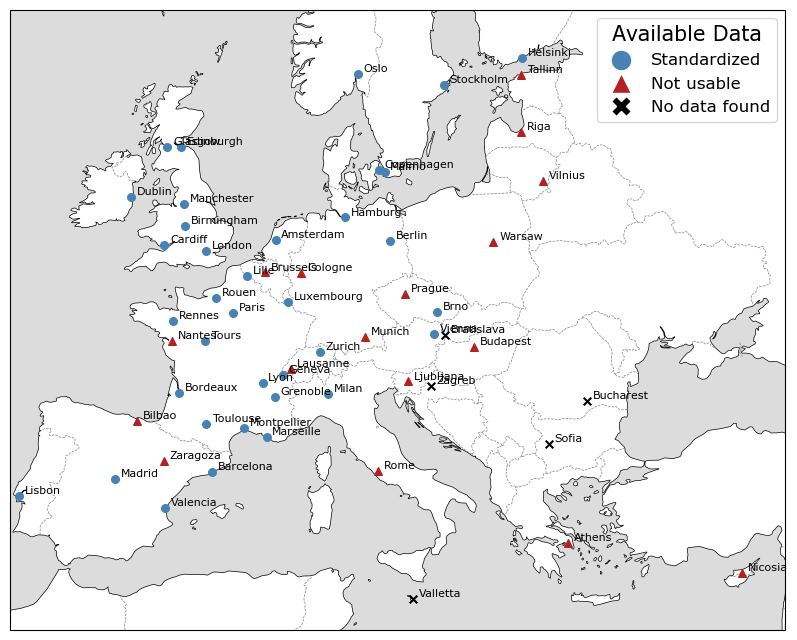

In [6]:
crs = ccrs.LambertConformal(
    central_longitude = 12.5
)

df.to_crs(crs, inplace=True)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1, 1, 1, projection=crs)
# xmin, xmax, ymin, ymax
xmin, xmax, ymin, ymax = -1900000, 2100000, -500000, 2700000
ax.set_extent([xmin, xmax, ymin, ymax], crs=crs)

# Background features
ax.add_feature(cfeature.LAND, facecolor = 'white')
ax.add_feature(cfeature.OCEAN, facecolor = 'gainsboro')
ax.add_feature(cfeature.COASTLINE, lw = .5, edgecolor = 'black')
ax.add_feature(cfeature.BORDERS, linestyle='dashed', lw = .5, edgecolor = 'gray')
#ax.add_feature(cfeature.LAKES, alpha=0.5, facecolor = 'lightblue')
#ax.add_feature(cfeature.RIVERS, lw = .2, edgecolor = 'lightblue')

for sub, color, marker in zip(
    [df[(df.data_presence == True) & (df.treated_data == True)], 
     df[(df.data_presence == True) & (df.treated_data == False)], 
     df[~df['data_presence']]],
    ['steelblue', 'firebrick', 'black'],
    ['o', '^', 'x']
) :
    sub.plot(ax=ax, zorder=np.inf, 
             color = color, 
             marker=marker, 
             markersize = 30, 
             edgecolor = None)


for k in df.index :
    plt.annotate(df.loc[k].city_name, 
                 (df.loc[k].geometry.coords[0][0] + 30000,
                 df.loc[k].geometry.coords[0][1] + 10000),
                #  (df.loc[k].lon, 
                # df.loc[k].lat),
                family = 'sans-serif',
                 fontsize = 8, zorder = np.inf, color = 'k')
    
    
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markersize=15, label='Standardized'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='firebrick', markersize=15, label='Not usable'),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='k', markersize=15, label='No data found')
]

# Add the custom legend
ax.legend(handles=custom_legend, title="Available Data", loc='upper right', fontsize = 12, title_fontsize = 15)

#plt.axis('off')
#plt.savefig('figure_1.svg')

# Figure 2

In [15]:
df = pd.read_csv('cities_summary.csv', delimiter = ',')
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs = 'epsg:4326')

In [16]:
element_sizes = {
            'Vienna' : 20, 
            'Brno' : 1.5, 
            'Copenhagen' : 20, 
            'Helsinki' : 20, 
            'Bordeaux' : 15, 
            'Grenoble' : 20,
            'Lille' : 5, 
            'Lyon' : 3, 
            'Marseille' : 1.5, 
            'Montpellier' : 5,
            'Paris' : 1.5, 
            'Rennes' : 10,
            'Rouen' : 20, 
            'Toulouse' : 5, 
            'Tours' : 5, 
            'Berlin' : 20, 
            'Hamburg' : 20,
            'Dublin' : 10,
            'Milan' : 20, 
            'Luxembourg' : 20,
            'Amsterdam' : 1.5,
            'Oslo' : 20, 
            'Lisbon' : 10,
            'Barcelona' : 2,
            'Madrid' : 3,
            'Valencia' : 20, 
            'Malmo' : 15, 
            'Stockholm' : 3, 
            'Geneva' : 15,
            'Zurich' : 20,
            'Birmingham' : 20, 
            'Cardiff' : 20, 
            'Edinburgh' : 20, 
            'Glasgow' : 20, 
            'London' : 3,
            'Manchester' : 20
}

C:\Users\xbonnema\AppData\Local\Temp\ipykernel_33544\619246926.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = cm.get_cmap("Reds")
36it [01:35,  2.66s/it]


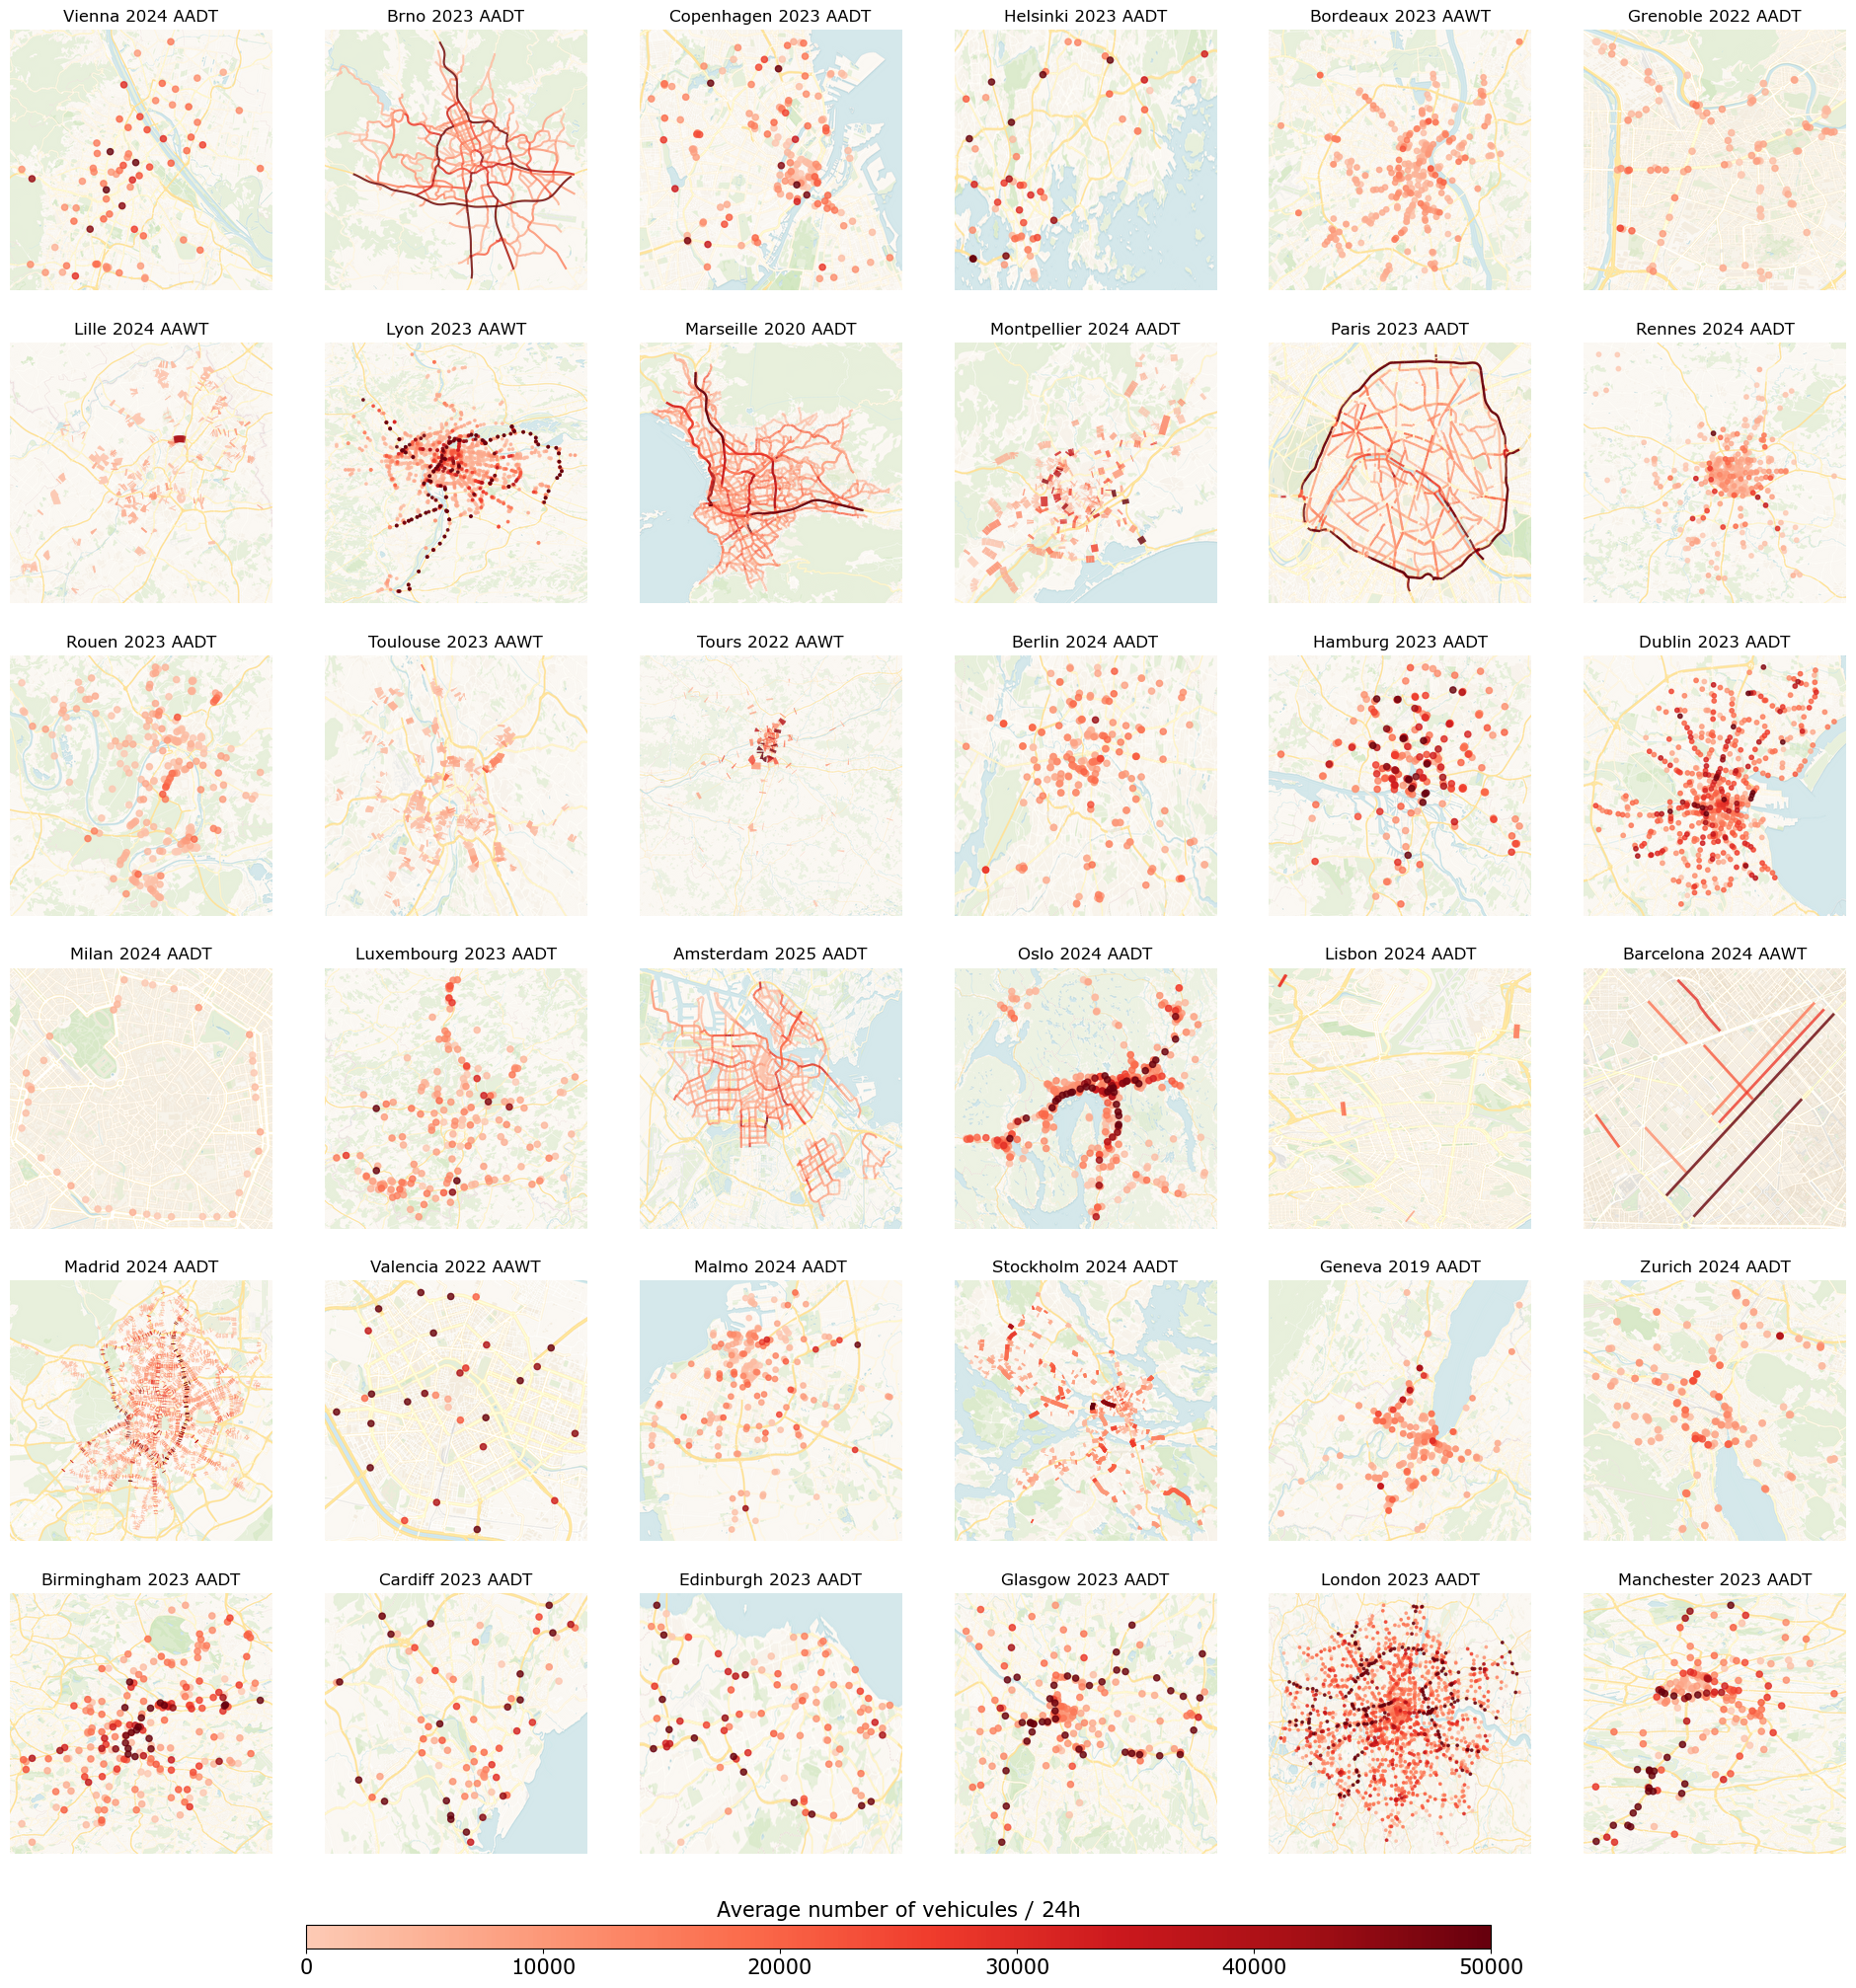

In [17]:
# Intialize figure

# Load the "Reds" colormap
base_cmap = cm.get_cmap("Reds")

# Create a new colormap that starts at 20% (0.2) and goes to 100% (1.0)
cmap = mcolors.LinearSegmentedColormap.from_list(
    "clipped_Reds", base_cmap(np.linspace(0.2, 1.0, 256))
)

fig, axes = plt.subplots(6, 6, figsize = (24, 24))
#cmap = 'Reds'

sub = df[df.treated_data][['country', 'city_name']].reset_index().sort_values(by = ['country', 'city_name'])
# In sorted dataframe"
for idx, val  in tqdm(enumerate(sub[['country', 'city_name']].values)): 
    country, city = val
    #print(idx, country, city)
    
    ax = axes[idx//6][idx%6]
    # l_files = []
    # Read only the latest file
    if city in ['Rouen', 'Copenhagen'] : # In those cases 2024 has a low number of measurments compare to earlier
        filename = os.listdir(f'../{country}/{city}/treated/')[-2]
    else :
        filename = os.listdir(f'../{country}/{city}/treated/')[-1]
    gdf = gpd.read_file(f'../{country}/{city}/treated/{filename}')
    # Choose variable to plot
    var = 'AADT' if 'AADT' in gdf.columns else 'AAWT'
    year = int(filename.split('.')[0][-4:])
    
    gdf.sort_values(by = var, inplace=True)
    
    if gdf.geometry.type[0] == 'Point':
    # Plot
        im = gdf.plot(ax=ax, column = var, 
                alpha = .8, 
                vmin = 0, vmax = 50000,
                legend = False, cmap = cmap, 
                markersize = element_sizes[city],
                # legend_kwds = {'shrink':.5, 'label':var}
                )
    else :
        # Lines
        im = gdf.plot(ax=ax, column = var, 
                alpha = .8, 
                vmin = 0, vmax = 50000,
                legend = False, cmap = cmap, 
                lw = element_sizes[city],
                # legend_kwds = {'shrink':.5, 'label':var}
                )

    # Background
    cx.add_basemap(ax, crs = gdf.crs, 
               source=cx.providers.CartoDB.VoyagerNoLabels, interpolation='sinc', attribution = '', attribution_size=0)
    
    # Axes
    ax.set_title(f'{city} {year} {var}')
    ax.axis('off')
    ax.set_aspect('auto')
    
# Colorbar
im = plt.gca().get_children()[0]
#cmap = matplotlib.cm.Reds
bounds = [0, 10000, 20000, 30000, 40000, 50000]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_ax = fig.add_axes([0.25, .07, 0.5, 0.01]) #(left, bottom, width, height)
cbar = fig.colorbar(im, orientation = 'horizontal', cax=cbar_ax, 
             ticks=bounds, norm=norm, spacing='uniform')
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_title(label = 'Average number of vehicules / 24h', fontsize = 15)
cbar.solids.set(alpha=1)


plt.savefig('fig_2.pdf')

# Figure 3

In [10]:
# 1st load of data to sort the median values

aadts = []
aawts = []
cities = []
for country, city in df[df.treated_data][['country', 'city_name']].values[::-1]: # Going reverse for boxplot later
    #df[df.treated_data][['country', 'city_name']]
    #print(country, city)
    l_files = []
    if city in ['Rouen', 'Copenhagen']:
        # We take the previous year to get more sensors
    # Read only the latest file
        filename = os.listdir(f'../{country}/{city}/treated/')[-2]
    else :
        filename = os.listdir(f'../{country}/{city}/treated/')[-1]
    gdf = gpd.read_file(f'../{country}/{city}/treated/{filename}')
    cities.append(city)
    
    # Shoudl not happen
    if 'osm_type' not in gdf.columns:
        # Then we miss information
        print(country, city)
    
    if df.loc[(df.country == country) & (df.city_name == city)].AADT.values[0] :
        aadts.append([float(x) for x in gdf['AADT'].dropna().values])
        
    else:
        aadts.append([])
        
    if df.loc[(df.country == country) & (df.city_name == city)].AAWT.values[0] :

        aawts.append([float(x) for x in gdf['AAWT'].dropna().values])
        
    else:
        aawts.append([])
        


In [11]:
# Sort median values
medians = []
for aadt, aawt in zip(aadts, aawts):
    #print([np.median(aadt), np.median(aawt)])
    medians.append(np.nanmean([np.median(aadt), np.median(aawt)]))
    #print(medians[-1])
    
sub = df[df.treated_data][['country', 'city_name']].reset_index()
sub['median'] = medians[::-1] # Because previous reverse
sub.sort_values('median', inplace=True)

c:\Users\xbonnema\miniconda3\envs\geodata\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\xbonnema\miniconda3\envs\geodata\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [12]:
# 2nd Load with correct order

aadts = []
aawts = []
cities = []
l_df = []
# In sorted dataframe"
for country, city in sub[['country', 'city_name']].values[::-1]: # Going reverse for boxplot later
    #print(country, city)
    l_files = []
    if city in ['Rouen', 'Copenhagen']:
        # We take the previous year to get more sensors
    # Read only the latest file
        filename = os.listdir(f'../{country}/{city}/treated/')[-2]
    else :
        filename = os.listdir(f'../{country}/{city}/treated/')[-1]
    gdf = gpd.read_file(f'../{country}/{city}/treated/{filename}')
    cities.append(city)
    
    # Shoudl not happen
    if 'osm_type' not in gdf.columns:
        # Then we miss information
        print(country, city)
    s = pd.DataFrame(data = 100 * gdf.osm_type.fillna("No match").value_counts() / gdf.shape[0])
    s.rename(columns = {'count':city}, inplace=True)
    l_df.append(s)
    
    
        # Shoudl not happen
    if 'osm_type' not in gdf.columns:
        # Then we miss information
        print(country, city)
    
    if df.loc[(df.country == country) & (df.city_name == city)].AADT.values[0] :
        aadts.append([float(x) for x in gdf['AADT'].dropna().values])
        
    else:
        aadts.append([])
        
    if df.loc[(df.country == country) & (df.city_name == city)].AAWT.values[0] :

        aawts.append([float(x) for x in gdf['AAWT'].dropna().values])
        
    else:
        aawts.append([])
        
types = pd.concat(l_df, axis = 1)

In [13]:
motorway, trunk, primary , secondary, tertiary, others, no_match =  'maroon', 'firebrick','sandybrown', 'khaki', 'mediumseagreen', 'mediumturquoise', 'lightgrey'
#'coral', 'bisque', 'khaki', 'lightgrey'
#'khaki', 'mediumseagreen', 'steelblue', 'lightgrey', # 'grey'
# 'crimson,
# 'firebrick', 

colors = {'motorway': motorway,
 'motorway_link':motorway,
 'trunk': trunk,
 'trunk_link': trunk,
 'primary': primary,
 'primary_link': primary,
 'secondary': secondary,
 'secondary_link': secondary,
 'tertiary': tertiary,
 'tertiary_link': tertiary,
 'unclassified': others,
 'residential': others,
 'living_street': others,
 'service': others,
#  'track': others,
#  'path': others,
#  'footway': others,
#  'cycleway': others,
#  'bridleway': others,
'busway': others,
'escape': others,
#  'other': others,
 'No match': no_match}

road_types = [
   
    'motorway', 'motorway_link', 
     'trunk', 'trunk_link', 
     'primary', 'primary_link', 
     'secondary', 'secondary_link', 
     'tertiary', 'tertiary_link', 'unclassified', 
     'residential', 'living_street', 'service', 
     'track', 'path', 'footway', 'cycleway', 'bridleway', 'busway', 'escape', 'other',
      'No match', ]

types = types.reindex(
    road_types
).dropna(axis = 0, how = 'all')#.sum(axis = 0)

# Fill NaNs with 0 (important for stacking)
types = types.fillna(0)

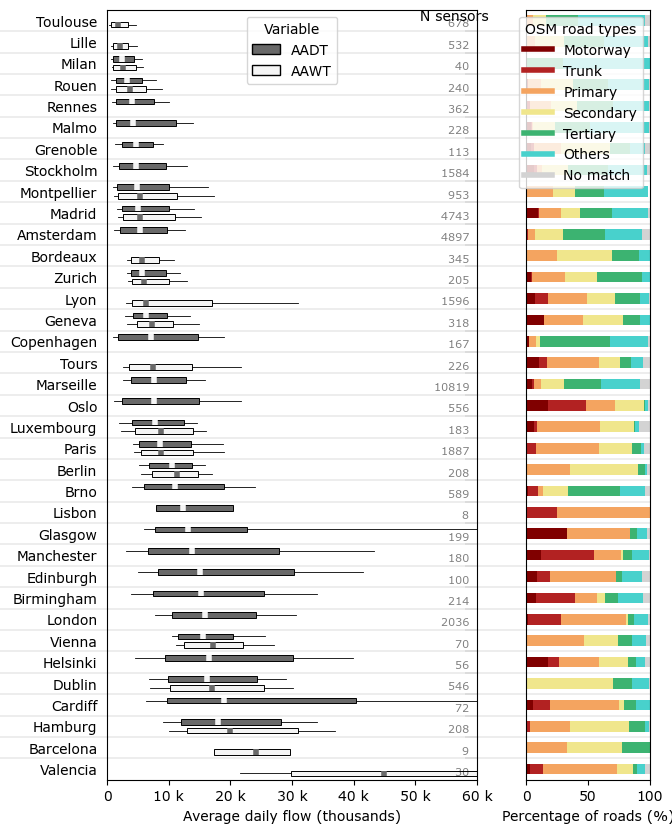

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (7,10), sharey = True, width_ratios=[3, 1])

# BOXPLOTS
ax = axes[0]

# Colors
aadt_color = 'dimgray'
aawt_color = 'whitesmoke'
# Width of lines
aadt_lines = dict(linewidth=.6, color='k')
aawt_lines = dict(linewidth=.6, color='k')

for i, k in enumerate(cities):
    # Fo each city
    if len(aadts[i]) + len(aawts[i]) > 0 : # if we have data
        # AADT
        bp0 = ax.boxplot(aadts[i], orientation='horizontal', positions = [i + .2],
                    whis = (15, 85), 
                    showfliers=False, 
                    showcaps = False,
                    #meanline=True, showmeans=True, meanprops=dict(linestyle='solid', linewidth=2.5, color='firebrick'),
                    medianprops=dict(color = aawt_color, lw = 4, zorder = 2),
                    #boxprops=aadt_lines,
                    whiskerprops=aadt_lines,
                    widths = [.26],
                    #capprops=aadt_lines,
                    patch_artist=True
                    )
        # AAWT
        bp1 = ax.boxplot(aawts[i], orientation='horizontal', positions = [i - .2],
            whis = (15, 85), 
            showfliers=False, 
            showcaps = False,
            medianprops = dict(color = aadt_color, lw = 4, zorder = 2),
            # meanline=True, showmeans=True, meanprops=dict(linestyle='solid', linewidth=2.5, color='firebrick'),
            #boxprops=aawt_lines,
            whiskerprops=aawt_lines,
            widths = [.26],
            #capprops=aawt_lines,
            patch_artist=True
            )
        
        for box in bp0['boxes']:
            # change fill color
            box.set_facecolor(aadt_color)
            box.set_edgecolor('k')
            box.set_linewidth(.7)
            
        for box in bp1['boxes']:
            # change fill color
            box.set_facecolor(aawt_color)
            box.set_edgecolor('k')
            box.set_linewidth(.7)

# Custom LEGEND patches with black edges
custom_legend = [
    mpatches.Patch(facecolor=aadt_color, edgecolor="black", linewidth=1, label="AADT"),
    mpatches.Patch(facecolor=aawt_color, edgecolor="black", linewidth=1, label="AAWT"),
]

ax.legend(handles=custom_legend, title="Variable", loc='upper center', fontsize = 10, title_fontsize = 10)


# Add grey lines for readability
for k in range(len(cities)-1):
    ax.hlines(k + .5, -20000 , 60000,
               clip_on=False,
               lw = .1,
               color = 'k')
    
ax.annotate(' N sensors',
             (50000, len(cities)-1)
)
    
# NUMBER of sensors
for i, z in enumerate(zip([len(k) for k in aadts], [len(k) for k in aawts])):
    x, y = z
    if x>0 and y >0 :
        ax.annotate(f'{int(np.mean([x, y]))}  ', (60000, i-.3), color ='k', fontsize = 8, alpha = .5, horizontalalignment = 'right')
    elif x>0:
        ax.annotate(f'{x}  ', (60000, i-.3), color ='k', fontsize = 8, alpha = .5, horizontalalignment = 'right')
    elif y>0:
        ax.annotate(f'{y}  ', (60000, i-.3), color ='k', fontsize = 8, alpha = .5, horizontalalignment = 'right')
        
# Format axis
ax.set_xlim(0, 60000)
ax.xaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax.set_xlabel('Average daily flow (thousands)')

ax.set_yticks(range(len(aadts)), cities)
ax.tick_params(left = False) 

##################################################
#### OSM type distribution ###
#####################################################
ax = axes[1]

# Create horizontal stacked bar plot
types.T.plot(ax=ax, kind="barh", stacked=True,
          color=[colors[r] for r in types.index], 
          width = .5
          )

# Labels and formatting
ax.set_xlabel("Percentage of roads (%)")
# plt.ylabel("City")
ax.set_xlim(0, 100)  # Ensure x-axis is from 0 to 100%

# Legend custom
custom_legend = [
    Line2D([0], [0], lw = 4, color = motorway,  label='Motorway'),
    Line2D([0], [0], lw = 4, color= trunk, label='Trunk'),
    Line2D([0], [0], lw = 4, color= primary, label='Primary'),
    Line2D([0], [0], lw = 4, color= secondary, label='Secondary'),
    Line2D([0], [0], lw = 4, color= tertiary, label='Tertiary'),
    Line2D([0], [0], lw = 4, color= others, label='Others'),
    Line2D([0], [0], lw = 4, color= no_match, label='No match'),
]
ax.legend(handles=custom_legend, title="OSM road types", loc='upper right', fontsize = 10, title_fontsize = 10)
ax.tick_params(left = False) 

# Add grey lines for readability
for k in range(len(cities)-1):
    ax.hlines(k + .5, -50 , 100,
               clip_on=False,
               lw = .1,
               color = 'k')

# Show plot
#plt.tight_layout()
plt.savefig('fi3.svg')

plt.show()